In [35]:
# Chargement des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler




In [2]:
# Lecture du fichier
data = pd.read_csv('/Users/jnmattei/Desktop/Equancy - Test technique/data.csv', decimal=',')
data

Entreprise               Metier  \
0                                                Sanofi       Data scientist   
1                   Massachusetts General Hospital(MGH)      Data architecte   
2                                                 Delve  Lead data scientist   
3     Ann & Robert H. Lurie Children’s Hospital of C...       Data scientist   
4                                                   Arm       Data scientist   
...                                                 ...                  ...   
9577                Massachusetts General Hospital(MGH)       Data scientist   
9578                            Charles River Analytics       Data scientist   
9579                                     Ball Aerospace       Data scientist   
9580                              Takeda Pharmaceutical       Data scientist   
9581                                             Vertex       Data scientist   

                                           Technologies Diplome  Experience  \
0         Matlab/Python/Pyspark/Scikit-learn/Tensorflow  Master         1.0   
1                             Python/Java/Scala/MongoDB  Master         3.0   
2     SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...  Master         3.0   
3                                     C/C++/Java/Python  Master         1.5   
4       Matlab/Python/C++/numpy/Tensorflow/scikit-learn     Phd         NaN   
...                                                 ...     ...         ...   
9577                     C++/R/Python/Matlab/Matplotlib  Master         1.5   
9578     Excel/Python/Matlab/R/machine learning/anglais  Master        11.0   
9579                       R/machine learning/Excel/VBA  Master         1.0   
9580    Python/Pyspark/machine learning/Microsoft Azure  Master        17.0   
9581                                 VBA/Python/Excel/R     Phd         0.0   

          Ville  
0         Paris  
1     Marseille  
2        Nantes  
3     Marseille  
4      Bordeaux  
...         ...  
9577       Lyon  
9578   Toulouse  
9579      Paris  
9580     Rennes  
9581      Paris  

[9582 rows x 6 columns]

In [3]:
# On regarde le nombre d'observations et de variables du dataframe
len(data)
data.shape

(9582, 6)

In [4]:
# valeurs manquantes
data.isna().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

1) Il y a 9582 observations qui contiennent quelques valeurs manquantes dans ce dataset.

In [5]:
# 2) imputation des valeurs manquantes pour la variable "Experience"


data['Experience'] = np.where((data['Metier'] == 'Data scientist') & data['Experience'].isna() ,data['Experience'].median(),data['Experience'])
data['Experience'] = np.where((data['Metier'] == 'Data engineer') & data['Experience'].isna() ,data['Experience'].mean(),data['Experience'])
data['Experience'] = np.where((data['Metier'] == 'Lead data scientist') & data['Experience'].isna() ,data['Experience'].mean(),data['Experience'])
data['Experience'] = np.where((data['Metier'] == 'Data architecte') & data['Experience'].isna() ,data['Experience'].mean(),data['Experience'])

In [6]:
data['Experience'].median()

2.0

In [7]:
data['Experience'].mean()

2.8114495798319328

In [8]:
data['Experience'].isna().sum()

0

In [9]:
data

Entreprise               Metier  \
0                                                Sanofi       Data scientist   
1                   Massachusetts General Hospital(MGH)      Data architecte   
2                                                 Delve  Lead data scientist   
3     Ann & Robert H. Lurie Children’s Hospital of C...       Data scientist   
4                                                   Arm       Data scientist   
...                                                 ...                  ...   
9577                Massachusetts General Hospital(MGH)       Data scientist   
9578                            Charles River Analytics       Data scientist   
9579                                     Ball Aerospace       Data scientist   
9580                              Takeda Pharmaceutical       Data scientist   
9581                                             Vertex       Data scientist   

                                           Technologies Diplome  Experience  \
0         Matlab/Python/Pyspark/Scikit-learn/Tensorflow  Master         1.0   
1                             Python/Java/Scala/MongoDB  Master         3.0   
2     SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...  Master         3.0   
3                                     C/C++/Java/Python  Master         1.5   
4       Matlab/Python/C++/numpy/Tensorflow/scikit-learn     Phd         2.0   
...                                                 ...     ...         ...   
9577                     C++/R/Python/Matlab/Matplotlib  Master         1.5   
9578     Excel/Python/Matlab/R/machine learning/anglais  Master        11.0   
9579                       R/machine learning/Excel/VBA  Master         1.0   
9580    Python/Pyspark/machine learning/Microsoft Azure  Master        17.0   
9581                                 VBA/Python/Excel/R     Phd         0.0   

          Ville  
0         Paris  
1     Marseille  
2        Nantes  
3     Marseille  
4      Bordeaux  
...         ...  
9577       Lyon  
9578   Toulouse  
9579      Paris  
9580     Rennes  
9581      Paris  

[9582 rows x 6 columns]

In [10]:
# 3) Nombre d'années d'expérience par métier
exp_year = pd.DataFrame(data.groupby(['Metier'])['Experience'].mean().reset_index(level=["Metier"]))
exp_year

Metier  Experience
0      Data architecte    2.998428
1        Data engineer    2.983481
2       Data scientist    2.241268
3  Lead data scientist    3.947408

In [11]:
# Sort the table
exp_year = exp_year.sort_values(by=['Experience'])

4) Représentation Graphique

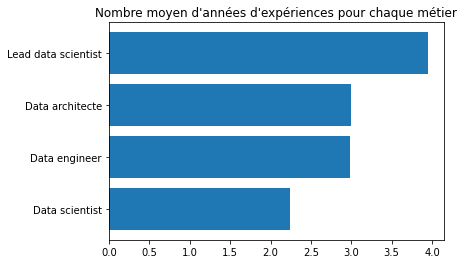

In [12]:
# Barplot
plt.barh(y=exp_year.Metier, width=exp_year.Experience);

# Add title
plt.title("Nombre moyen d'années d'expériences pour chaque métier");

5) Transformation de la variable "Experience"

In [13]:
data.Experience.describe()

count    9582.000000
mean        2.811450
std         2.703343
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        21.000000
Name: Experience, dtype: float64

In [17]:
Exp_level = pd.cut(data['Experience'], bins=4, labels=("Débutant", "Confirmé", "Avancé", "Expert"))
data["Exp_label"] = pd.Series(Exp_level, index=data.index)

Mon choix a été réalisé à partir de la distribution de la variable "Experience".

6) Extraction des 5 technologies qui apparaissent le plus

In [18]:
# copie du dataframe
data_ = data.copy()

In [19]:
# les technologies sont séparés par "/", on procède donc à un split de ces technos
data_.Technologies = data.Technologies.str.split('/')
data_

Entreprise               Metier  \
0                                                Sanofi       Data scientist   
1                   Massachusetts General Hospital(MGH)      Data architecte   
2                                                 Delve  Lead data scientist   
3     Ann & Robert H. Lurie Children’s Hospital of C...       Data scientist   
4                                                   Arm       Data scientist   
...                                                 ...                  ...   
9577                Massachusetts General Hospital(MGH)       Data scientist   
9578                            Charles River Analytics       Data scientist   
9579                                     Ball Aerospace       Data scientist   
9580                              Takeda Pharmaceutical       Data scientist   
9581                                             Vertex       Data scientist   

                                           Technologies Diplome  Experience  \
0     [Matlab, Python, Pyspark, Scikit-learn, Tensor...  Master         1.0   
1                        [Python, Java, Scala, MongoDB]  Master         3.0   
2     [SPSS, SQL, Teradata, R, Python, Tensorflow, s...  Master         3.0   
3                                [C, C++, Java, Python]  Master         1.5   
4     [Matlab, Python, C++, numpy, Tensorflow, sciki...     Phd         2.0   
...                                                 ...     ...         ...   
9577               [C++, R, Python, Matlab, Matplotlib]  Master         1.5   
9578  [Excel, Python, Matlab, R, machine learning, a...  Master        11.0   
9579                  [R, machine learning, Excel, VBA]  Master         1.0   
9580  [Python, Pyspark, machine learning, Microsoft ...  Master        17.0   
9581                            [VBA, Python, Excel, R]     Phd         0.0   

          Ville Exp_label  
0         Paris  Débutant  
1     Marseille  Débutant  
2        Nantes  Débutant  
3     Marseille  Débutant  
4      Bordeaux  Débutant  
...         ...       ...  
9577       Lyon  Débutant  
9578   Toulouse    Avancé  
9579      Paris  Débutant  
9580     Rennes    Expert  
9581      Paris  Débutant  

[9582 rows x 7 columns]

In [20]:
# get a separate row for each value
data_ = data_.explode('Technologies').reset_index(drop=True)
data_

Entreprise          Metier     Technologies Diplome  \
0                     Sanofi  Data scientist           Matlab  Master   
1                     Sanofi  Data scientist           Python  Master   
2                     Sanofi  Data scientist          Pyspark  Master   
3                     Sanofi  Data scientist     Scikit-learn  Master   
4                     Sanofi  Data scientist       Tensorflow  Master   
...                      ...             ...              ...     ...   
43707  Takeda Pharmaceutical  Data scientist  Microsoft Azure  Master   
43708                 Vertex  Data scientist              VBA     Phd   
43709                 Vertex  Data scientist           Python     Phd   
43710                 Vertex  Data scientist            Excel     Phd   
43711                 Vertex  Data scientist                R     Phd   

       Experience   Ville Exp_label  
0             1.0   Paris  Débutant  
1             1.0   Paris  Débutant  
2             1.0   Paris  Débutant  
3             1.0   Paris  Débutant  
4             1.0   Paris  Débutant  
...           ...     ...       ...  
43707        17.0  Rennes    Expert  
43708         0.0   Paris  Débutant  
43709         0.0   Paris  Débutant  
43710         0.0   Paris  Débutant  
43711         0.0   Paris  Débutant  

[43712 rows x 7 columns]

In [21]:
data_.Technologies.value_counts()

Python     6627
R          4374
SQL        2581
Java       1719
Hadoop     1589
           ... 
MySQL        94
ORACLE       94
Windows      75
Perl         74
Ruby         35
Name: Technologies, Length: 61, dtype: int64

Les 5 technologies qui apparaissent le plus sont Python, R, SQL, Java et Hadoop.

In [22]:
# On construit un dataframe
tech = pd.DataFrame(data_.Technologies.value_counts().reset_index())

In [23]:
# On renomme les colonnes
tech.columns = ["Technologies","Nombre"]

In [24]:
# On garde les 5 premières lignes
tech_ = tech[:5]
tech_

Technologies  Nombre
0       Python    6627
1            R    4374
2          SQL    2581
3         Java    1719
4       Hadoop    1589

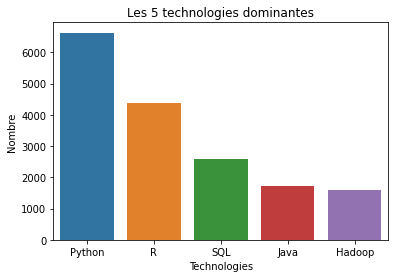

In [25]:
# graphique
sns.barplot(x = 'Technologies', y = 'Nombre', data = tech_)
plt.title('Les 5 technologies dominantes')
plt.show()

7) Clustering non supervisé

In [26]:
# il est nécessaire de convertir les variables qualitatives en varables discrètes

le = preprocessing.LabelEncoder()

data_enc = data.loc[:,['Experience']]
data_enc['Ville_enc'] = pd.Series(le.fit_transform(np.squeeze(data.loc[:,['Ville']])[:]), index = data_enc.index)
data_enc['Technologies_enc'] = pd.Series(le.fit_transform(np.squeeze(data.loc[:,['Technologies']])[:]), index = data_enc.index)
data_enc['Diplome_enc'] = pd.Series(le.fit_transform(np.squeeze(data.loc[:,['Diplome']])[:]), index = data_enc.index)
data_enc['Exp_level_enc'] = pd.Series(le.fit_transform(np.squeeze(data.loc[:,['Exp_label']])[:]), index = data_enc.index)
data_enc = np.round(data_enc,2)

# on vérifie les données
print(data_enc.head(10))
print(data_enc.info())





   Experience  Ville_enc  Technologies_enc  Diplome_enc  Exp_level_enc
0         1.0          8                27            1              2
1         3.0          4                34            1              2
2         3.0          6                51            1              2
3         1.5          4                 2            1              2
4         2.0          0                26            3              2
5         6.0          2                56            1              1
6         0.0          2                11            0              2
7         4.0         13                17            0              2
8         8.0          8                19            0              1
9         5.0         13                33            1              2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience    

In [27]:
# On passe toutes les variables en float
X = data_enc.astype(float)

# feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, max_iter = 100)
kmeans.fit(X_scaled)
labels_ = kmeans.labels_




In [30]:
# Evaluation de l'erreur du clustering
c1, c2 = kmeans.cluster_centers_
NMSE = lambda a,b: 100 * ((a-b)**2).sum() / ((a)**2).sum()
quad_dist1 = NMSE(X_scaled[labels_==0], c1) #NMSE() (X_scaled[y_pred==1]  - c2)**2).sum() / ((X_scaled[y_pred==1] )**2).sum()*100
quad_dist2 = NMSE(X_scaled[labels_==1], c2) # (X_scaled[y_pred==0]  - c1)**2).sum() / ((X_scaled[y_pred==0] )**2).sum()*100

19.209673020957084

On choisit la méthode des K-means car on connaît déjà le nombre de clusters.
On utilise ici l'erreur moyenne quadratique normalisée en métrique, on constate que les erreur obtenus sont inférieurs à 20%. Notre algorithme de clustering non-supervisée est donc satisfaisant.

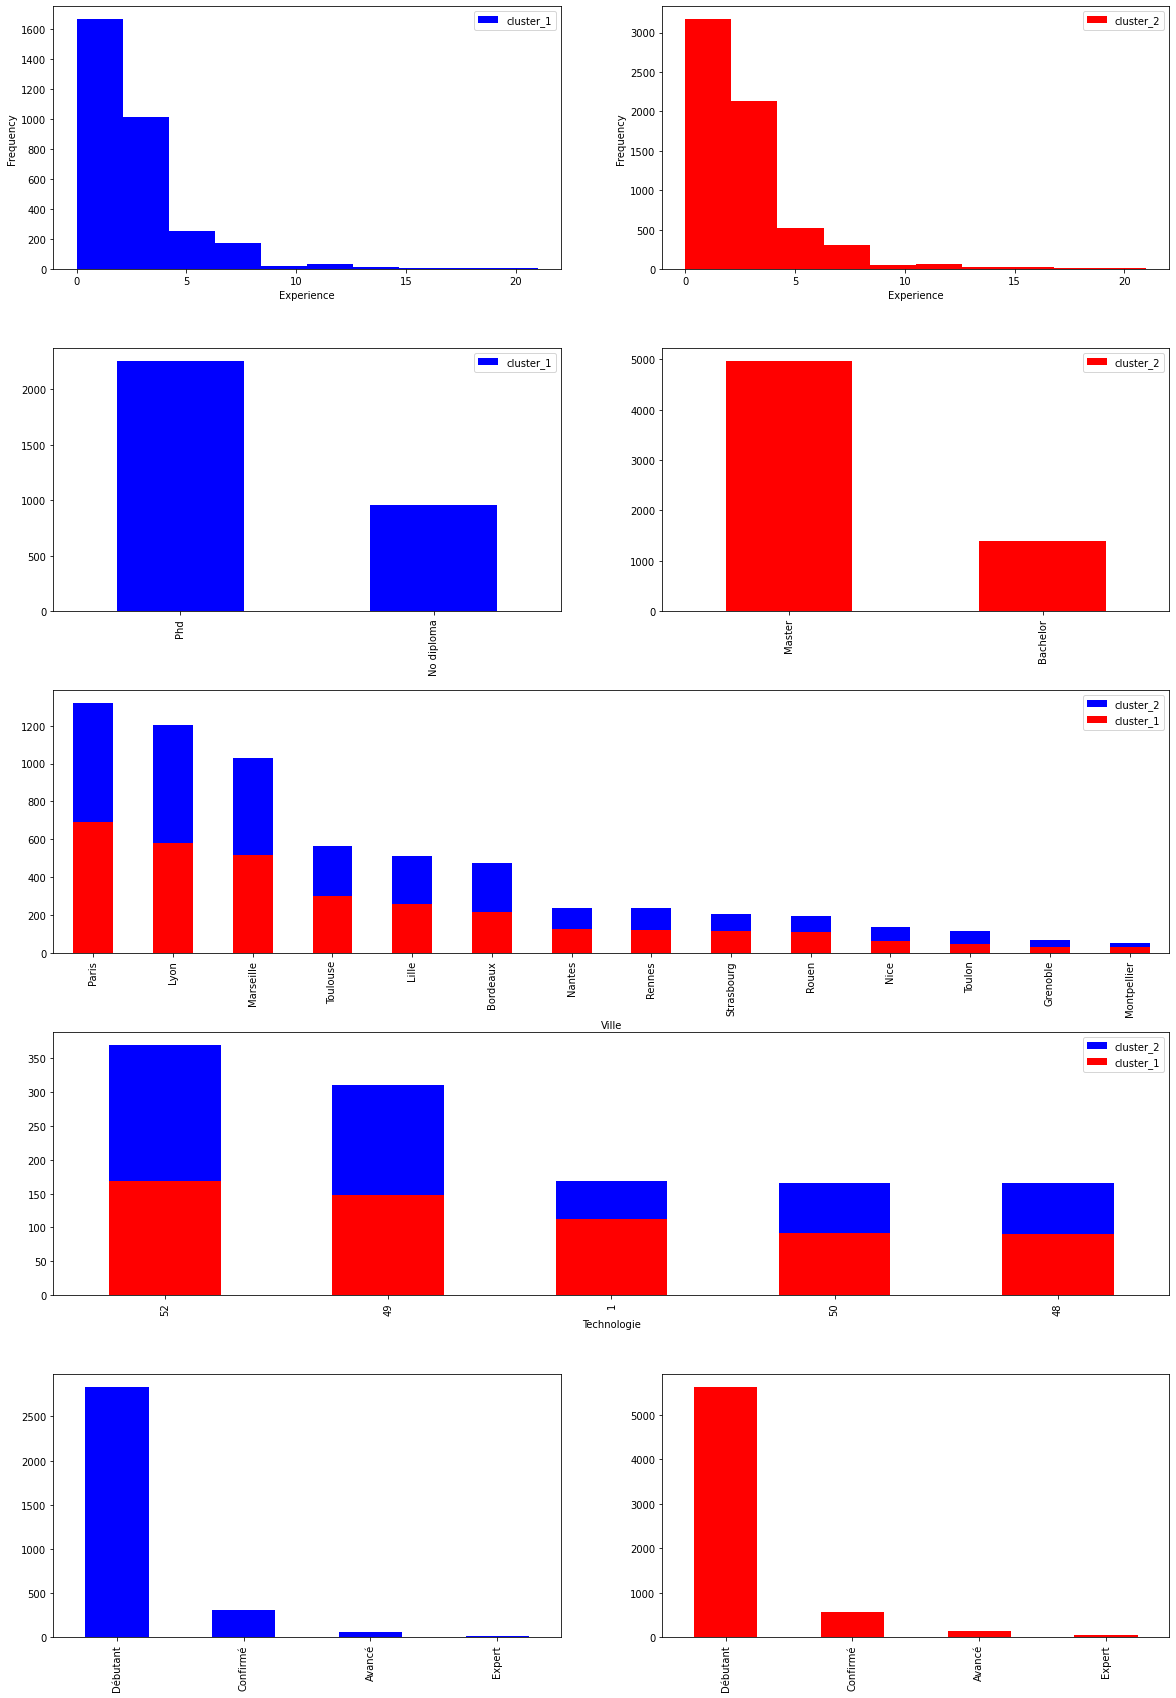

In [34]:
# Affichage des résultats     
plt.figure(figsize=(20,30))
plt.subplot(521),
ax = data_enc.loc[labels_==1,'Experience'].plot(kind='hist', color='blue', label='cluster_1')
plt.legend()
plt.xlabel("Experience")
plt.subplot(522),
ax = data_enc.loc[labels_==0,'Experience'].plot(kind='hist', color='red', label='cluster_2')
plt.xlabel("Experience")
plt.legend()

plt.subplot(523),
ax = data.loc[labels_==1,'Diplome'].value_counts().plot(kind='bar', color='blue', label='cluster_1')
plt.legend()
plt.subplot(524),
ax = data.loc[labels_==0,'Diplome'].value_counts().plot(kind='bar', color='red', label='cluster_2')
plt.legend()

plt.subplot(513),
ax = data.loc[labels_==0,'Ville'].value_counts().plot(kind='bar', color = 'blue', label='cluster_2')
ax = data.loc[labels_==1,'Ville'].value_counts().plot(kind='bar', color = 'red', label='cluster_1')
plt.xlabel("Ville")
plt.legend()

plt.subplot(514),
ax = data_enc.loc[labels_==0,'Technologies_enc'].value_counts()[0:5].plot(kind='bar', color = 'blue', label='cluster_2')
ax = data_enc.loc[labels_==1,'Technologies_enc'].value_counts()[0:5].plot(kind='bar', color = 'red', label='cluster_1')
plt.xlabel("Technologie")
plt.legend()



plt.subplot(529)
ax=data.loc[labels_==1,'Exp_label'].value_counts().plot(kind='bar', color='blue', label='cluster_1')
plt.subplot(5,2,10)
ax=data.loc[labels_==0,'Exp_label'].value_counts().plot(kind='bar', color='red', label='cluster_2')


plt.subplots_adjust(hspace=0.3)


Les principales différences des 2 clusters se font au niveau du diplôme et de l'expérience.      
En effet, le nombre d'années d'expérience du premier cluster est beaucoup plus élevé par rapport au second cluster.
Les technologies sont plus uniformes dans le cluster 1.

Nos résultats sont cohérents.

8) Prédiction des métiers manquants

In [41]:
# Manque de temps pour terminer le projet 